In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv(r"xlf.csv", skiprows=1, encoding="utf8")
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44


In [171]:
df.tail(2)

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
69,IVZ,Invesco Ltd,0.12%,16.52,-0.57,-3.34%,3.87 M,12.48 - 18.28
70,BEN,Franklin Resources Inc,0.10%,20.18,-0.06,-0.30%,6.19 M,19.50 - 30.32


In [172]:
# Dtype object usually means str

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         71 non-null     object 
 1   Company Name   71 non-null     object 
 2   Index Weight   71 non-null     object 
 3   Last           71 non-null     float64
 4   Change         71 non-null     float64
 5   %Change        71 non-null     object 
 6   Volume         71 non-null     object 
 7   52 Week Range  71 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.6+ KB


In [173]:
# apply is the only right way to use for loop in pandas

df["IW"] = df["Index Weight"].apply(lambda x : float(x.strip("%")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         71 non-null     object 
 1   Company Name   71 non-null     object 
 2   Index Weight   71 non-null     object 
 3   Last           71 non-null     float64
 4   Change         71 non-null     float64
 5   %Change        71 non-null     object 
 6   Volume         71 non-null     object 
 7   52 Week Range  71 non-null     object 
 8   IW             71 non-null     float64
dtypes: float64(3), object(6)
memory usage: 5.1+ KB


In [174]:
# What is the sum of volume

In [175]:
vol_sum = df["Volume"].apply(lambda x : float(x.strip("M"))).sum()
vol_sum = round(vol_sum, 2)
vol_sum

271.71

In [176]:
# What is the last price of company with Symbol C

In [177]:
df[df["Symbol"] == "C"]["Last"].squeeze()

61.46

In [178]:
# Get stock with the largest Volume

In [179]:
# answer

largest_vol = df["Volume"].apply(lambda x : float(x.strip("M"))).max()
df[df["Volume"] == f"{largest_vol} M"]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW
4,BAC,Bank of America Corp,4.41%,40.7,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41


In [180]:
# solution

df["Volume (M)"] = df["Volume"].apply(lambda x : float(x.strip("M")))
df[df["Volume (M)"] == df["Volume (M)"].max()]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,Volume (M)
4,BAC,Bank of America Corp,4.41%,40.7,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49


In [181]:
df.nlargest(3, "Volume (M)")

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,Volume (M)
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49
5,WFC,Wells Fargo & Co,3.24%,58.37,-0.10,-0.17%,15.93 M,38.39 - 62.55,3.24,15.93
63,KEY,KeyCorp,0.25%,16.73,-0.33,-1.93%,15.73 M,9.50 - 17.20,0.25,15.73


In [212]:
df[df["Company Name"].str.contains("corp", case=False)].count().iloc[0]

18

In [214]:
# How many company got Group in the name

In [216]:
df[df["Company Name"].str.contains("group", case=False)].count().iloc[0]

11

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Last,71.0,186.546056,163.751354,14.78,74.015,120.70,246.735,886.43
Change,71.0,-1.154930,3.867138,-22.79,-1.205,-0.33,0.125,7.44
IW,71.0,1.408310,2.215411,0.10,0.345,0.73,1.510,13.76
Volume (M),71.0,3.826901,6.336898,0.34,1.040,1.97,3.850,48.49


In [234]:
# Get the company with the largest/highest last price

In [244]:
df[df["Last"] == df.describe().T["max"]["Last"]]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,Volume (M)
11,BLK,BlackRock Inc,1.97%,886.43,-15.38,-1.71%,0.43 M,596.18 - 903.46,1.97,0.43


In [246]:
# plot as a pie chart 5 top companies by Volume

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         71 non-null     object 
 1   Company Name   71 non-null     object 
 2   Index Weight   71 non-null     object 
 3   Last           71 non-null     float64
 4   Change         71 non-null     float64
 5   %Change        71 non-null     object 
 6   Volume         71 non-null     object 
 7   52 Week Range  71 non-null     object 
 8   IW             71 non-null     float64
 9   Volume (M)     71 non-null     float64
dtypes: float64(4), object(6)
memory usage: 5.7+ KB


In [300]:
top_5 = df.nlargest(5, "Volume (M)")

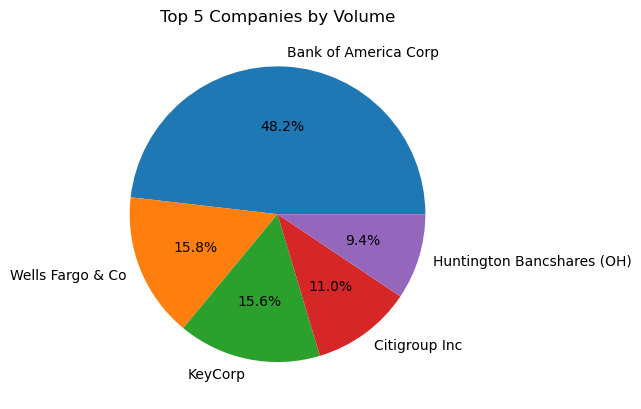

In [308]:
plt.pie(x = top_5["Volume (M)"], labels = top_5["Company Name"], autopct = "%1.1f%%")
plt.title("Top 5 Companies by Volume")
plt.show()

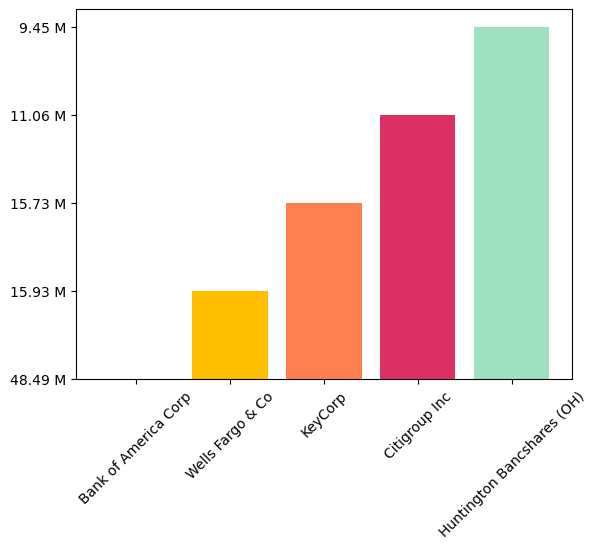

In [310]:
plt.bar(top_5["Company Name"], top_5["Volume"], color=["#DFFF00","#FFBF00","#FF7F50","#DE3163","#9FE2BF"])
plt.xticks(rotation=45)
plt.show()